Implantacao dos móddulos e bibliotecas

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Extracao do banco de dados

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 1s 0us/step


In [6]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


definicao entre imagens de treinamento e imagens de valudacao

In [7]:
base_dir= os.path.join (os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join (train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join (validation_dir, 'dogs')

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [11]:
train_image_generator = ImageDataGenerator (rescale= 1./255)
validation_image_generator = ImageDataGenerator(rescale= 1./255)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                            directory = train_dir,
                                                            shuffle = True,
                                                            target_size = (150,150),
                                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory( batch_size = BATCH_SIZE,
                                                              directory = validation_dir,
                                                               shuffle= True,
                                                               target_size= (150,150),
                                                               class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)

Visualizacao inicial

In [15]:
def plotImages (images_arr):
  fig, axes = plt.subplots(1,5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip (images_arr, axes):
    ax.imshow(img)
    plt.tight_layout()
    plt.show()

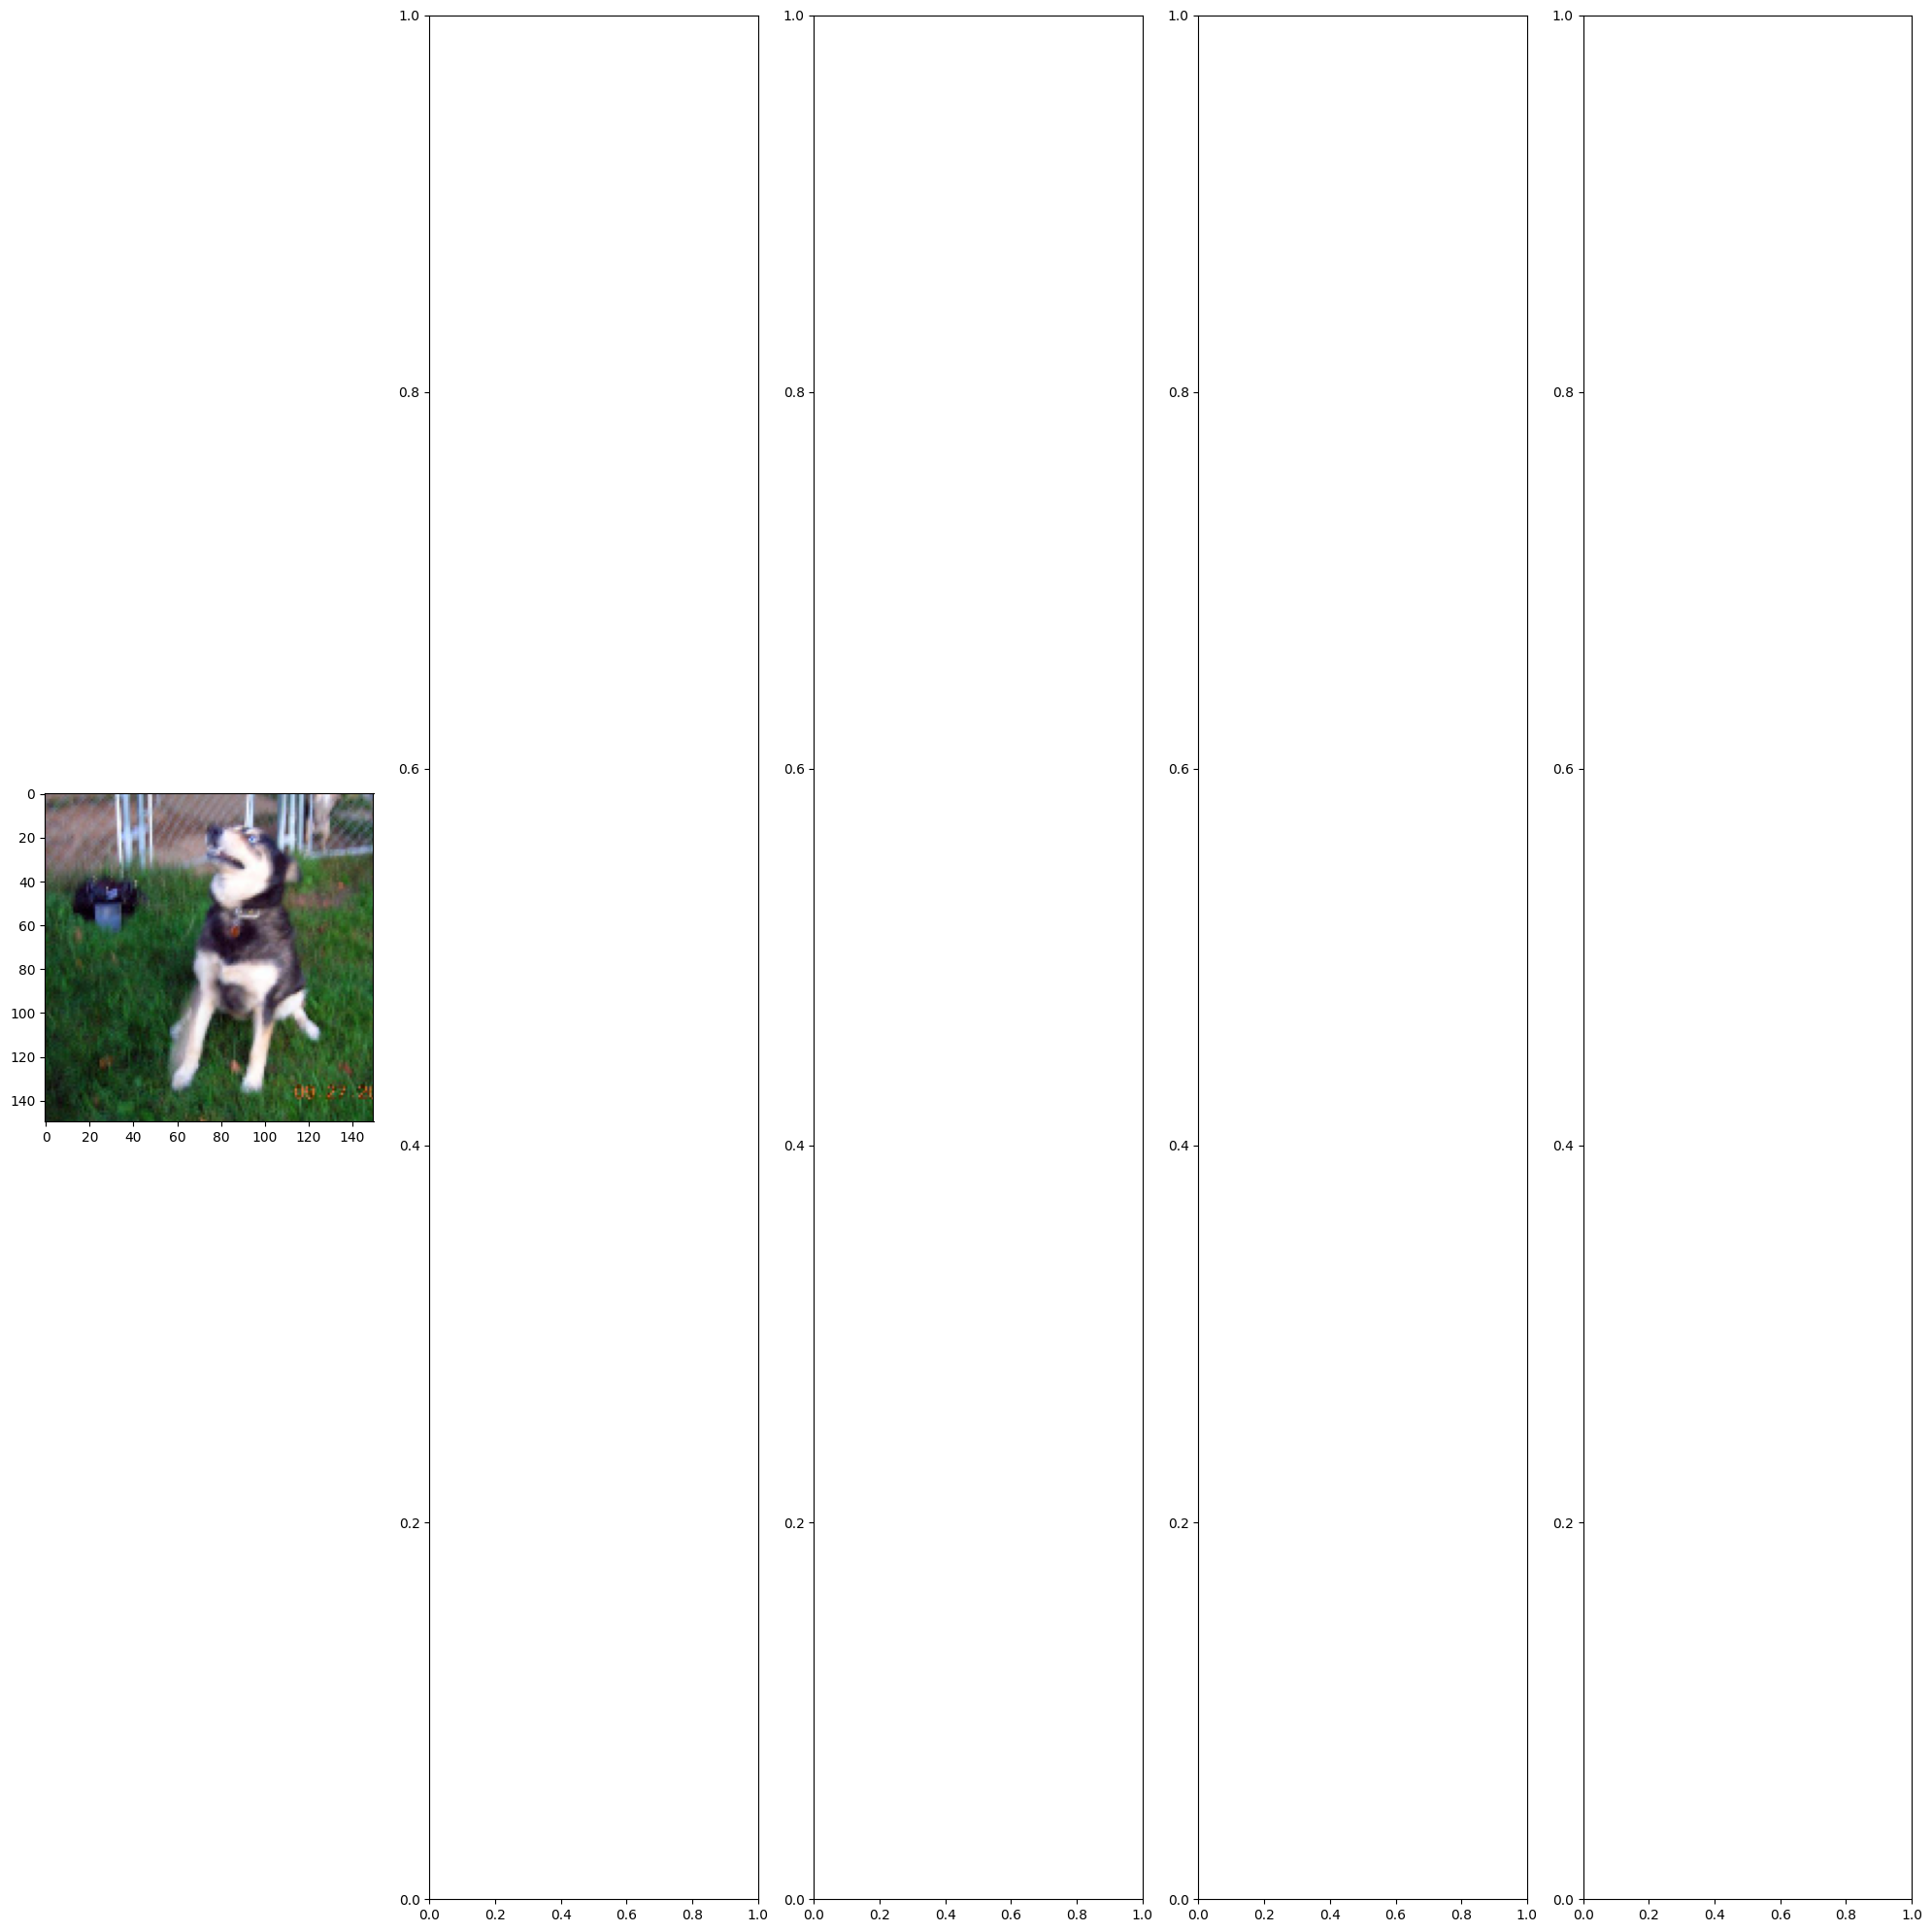

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
plotImages(sample_training_images[:5])

# Modelo

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
    ])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [20]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float (BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps= int (np.ceil(total_val/ float (BATCH_SIZE)))
)

<ipython-input-20-c622d1a58292>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 12s 261ms/step - loss: 0.7298 - accuracy: 0.5025 - val_loss: 0.6878 - val_accuracy: 0.5100
Epoch 2/100
20/20 [==============================] - 5s 258ms/step - loss: 0.6886 - accuracy: 0.5365 - val_loss: 0.6719 - val_accuracy: 0.5870
Epoch 3/100
20/20 [==============================] - 6s 284ms/step - loss: 0.6734 - accuracy: 0.5995 - val_loss: 0.6574 - val_accuracy: 0.6530
Epoch 4/100
20/20 [==============================] - 6s 301ms/step - loss: 0.6399 - accuracy: 0.6290 - val_loss: 0.6210 - val_accuracy: 0.6520
Epoch 5/100
20/20 [==============================] - 5s 255ms/step - loss: 0.6064 - accuracy: 0.6775 - val_loss: 0.5901 - val_accuracy: 0.6860
Epoch 6/100
20/20 [==============================] - 6s 296ms/step - loss: 0.5973 - accuracy: 0.6900 - val_loss: 0.5957 - val_accuracy: 0.6740
Epoch 7/100
20/20 [==============================] - 5s 262ms/step - loss: 0.5402 - accuracy: 0.7350 - val_loss: 0.5924 - val_accuracy: 0.688

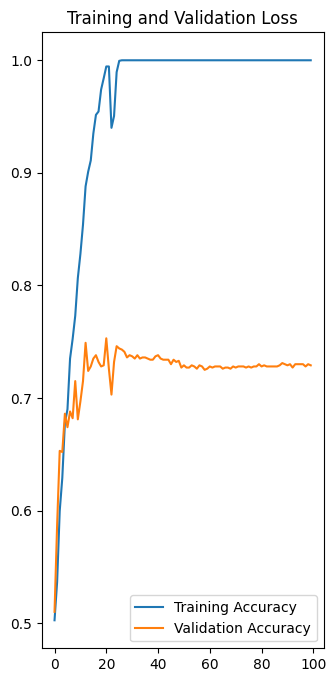

In [21]:
acc= history.history ['accuracy']
val_acc = history.history ['val_accuracy']

loss = history.history ['loss']
val_loss = history.history ['val_loss']

epochs_range= range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label= 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()